## Requirements

In [1]:
!pip install copernicusmarine xarray netCDF4 torch einops matplotlib

In [1]:
# Importazione delle Librerie
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
dataset = xr.load_dataset('data/processed/sea_level.nc')
sla_data = dataset['sla']
sla_data.shape



(1060, 370, 578)

In [4]:
dataset

<xarray.Dataset> Size: 18GB
Dimensions:    (time: 1060, latitude: 370, nv: 2, longitude: 578)
Coordinates:
  * time       (time) datetime64[ns] 8kB 2022-01-01 2022-01-02 ... 2024-11-25
  * latitude   (latitude) float32 1kB 19.94 20.06 20.19 ... 65.81 65.94 66.06
  * longitude  (longitude) float32 2kB -30.06 -29.94 -29.81 ... 41.94 42.06
  * nv         (nv) int32 8B 0 1
Data variables: (12/13)
    crs        (time) int32 4kB -2147483647 -2147483647 ... -2147483647
    lat_bnds   (time, latitude, nv) float32 3MB 19.88 20.0 20.0 ... 66.0 66.12
    lon_bnds   (time, longitude, nv) float32 5MB -30.12 -30.0 ... 42.0 42.12
    sla        (time, latitude, longitude) float64 2GB 0.1414 0.1307 ... nan nan
    err_sla    (time, latitude, longitude) float64 2GB 0.0082 0.008 ... nan nan
    ugosa      (time, latitude, longitude) float64 2GB -0.0102 -0.0101 ... nan
    ...         ...
    vgosa      (time, latitude, longitude) float64 2GB -0.158 -0.1661 ... nan
    err_vgosa  (time, latitude, longitude) float64 2GB 0.0478 0.0479 ... nan nan
    adt        (time, latitude, longitude) float64 2GB 0.4608 0.4496 ... nan nan
    ugos       (time, latitude, longitude) float64 2GB -0.0165 -0.0204 ... nan
    vgos       (time, latitude, longitude) float64 2GB -0.1675 -0.1746 ... nan
    flag_ice   (time, latitude, longitude) float64 2GB 0.0 0.0 0.0 ... nan nan
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2022-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-12-31T12:00:00Z
    title:                           NRT merged all satellites European Seas ...

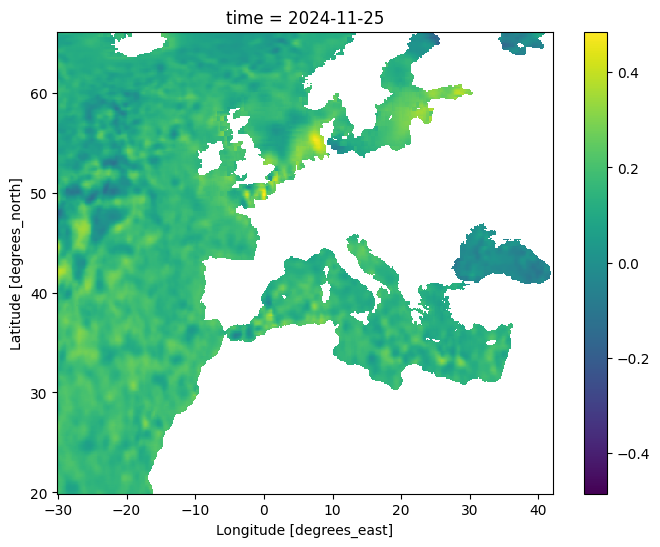

In [18]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
cbar = None

def update(frame):
    global cbar
    if cbar:
        cbar.remove()  # Clear the previous colorbar

    ax.clear()  # Clear the previous plot
    ax.set_title(f"SLA Heatmap - Time: {sla_data.time[frame].values}")
    im = sla_data.isel(time=frame).plot(
        ax=ax, cmap='viridis', add_colorbar=False
    )
    cbar = fig.colorbar(im, ax=ax, orientation='vertical')
    return im,

# Create the animation
ani = FuncAnimation(
    fig, update, frames=len(sla_data.time), interval=200, blit=False
)

# Save or display the animation
ani.save("sla_heatmap_animation.mp4", writer="ffmpeg", fps=10)
plt.show()


Total time samples: 1060
Average samples per day: 1.0


/var/folders/c4/gv3chscs56q54lqkfyt_hyf80000gn/T/ipykernel_65995/3049302994.py:7: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_samples = dataset.dims['time']


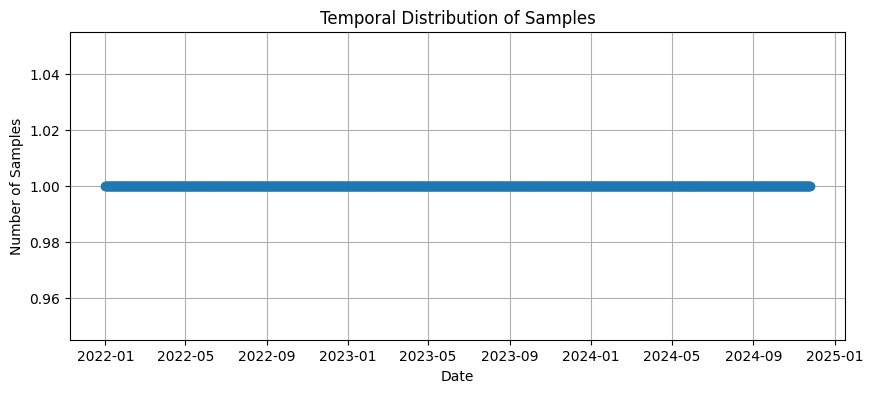

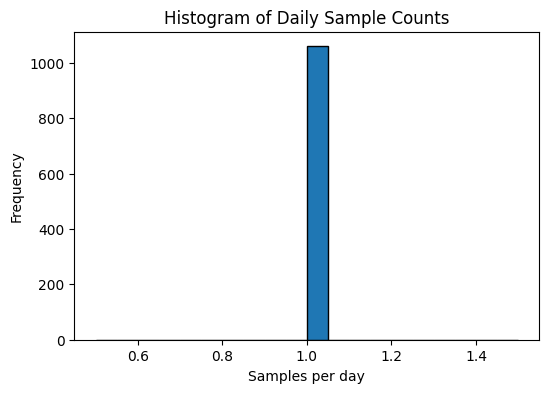

In [5]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


# 1. Number of samples in time
n_samples = dataset.dims['time']
print(f"Total time samples: {n_samples}")

# 2. Convert the time coordinate to a pandas datetime index
time_index = pd.to_datetime(dataset['time'].values)

# Create a DataFrame to analyze the time distribution
time_df = pd.DataFrame({'time': time_index})
time_df.set_index('time', inplace=True)

# Resample by day to count the number of samples per day
daily_counts = time_df.resample('D').size()
print("Average samples per day:", daily_counts.mean())

# 3. Plot the distribution of samples in time
plt.figure(figsize=(10, 4))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.title('Temporal Distribution of Samples')
plt.grid(True)
plt.show()

# Optionally, display histogram of daily sample counts
plt.figure(figsize=(6, 4))
plt.hist(daily_counts.values, bins=20, edgecolor='black')
plt.xlabel('Samples per day')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Sample Counts')
plt.show()


Total days: 1060
Date range: 2022-01-01T00:00:00.000000000 to 2024-11-25T00:00:00.000000000


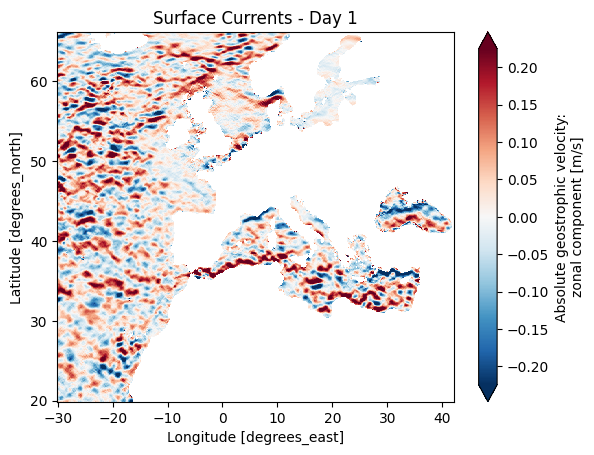

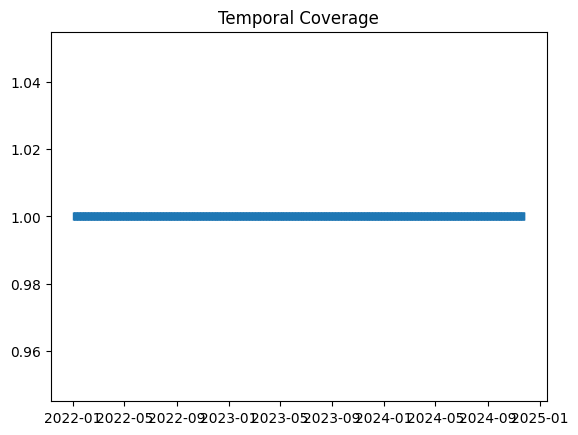

In [6]:
# Temporal analysis
print(f"Total days: {len(dataset.time)}")
print(f"Date range: {dataset.time[0].values} to {dataset.time[-1].values}")

# Spatial plot example
dataset.isel(time=0).ugos.plot(x="longitude", y="latitude", robust=True)
plt.title("Surface Currents - Day 1")
plt.show()

# Temporal distribution check
plt.plot(dataset.time, np.ones(len(dataset.time)), '|')
plt.title("Temporal Coverage")
plt.show()